In [1]:
import pickle

# Load the cleaned S&P 500 DataFrame from a pickle file
with open('pickle_files\cleaned_sp500_df.pkl', 'rb') as file:
    df_sp500 = pickle.load(file)
    
df_sp500.fillna(method='ffill', inplace=True)  # Forward-fill for existing gaps
df_sp500.fillna(method='bfill', inplace=True)  # Backward-fill for leading gaps

df_sp500

<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Nicolò Dal Monte\AppData\Local\Temp\ipykernel_12016\2103931965.py:4: SyntaxWarning: invalid escape sequence '\c'
  with open('pickle_files\cleaned_sp500_df.pkl', 'rb') as file:
C:\Users\Nicolò Dal Monte\AppData\Local\Temp\ipykernel_12016\2103931965.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sp500.fillna(method='ffill', inplace=True)  # Forward-fill for existing gaps
C:\Users\Nicolò Dal Monte\AppData\Local\Temp\ipykernel_12016\2103931965.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sp500.fillna(method='bfill', inplace=True)  # Backward-fill for leading gaps


Ticker,TSLA,MLM,POOL,PAYX,JCI,GPC,CAH,AJG,DLTR,HOLX,...,RCL,PRU,GRMN,HAS,ESS,NUE,JBHT,AMAT,ACGL,PYPL
Date,,,,,,,,,,,,,,,,,,,,,
2014-10-14 00:00:00+00:00,15.137333,98.845337,47.631180,31.855057,29.054077,65.548637,56.079235,36.220329,55.880001,23.920000,...,50.171078,52.597412,37.061481,39.956547,137.822662,38.207870,66.783379,16.996983,18.316668,36.709999
2014-10-15 00:00:00+00:00,15.313333,100.631470,47.970528,31.496561,28.512375,65.820229,55.064140,36.089497,55.240002,23.360001,...,48.691025,51.030968,37.849709,39.592178,138.176483,38.254654,66.946983,17.076080,17.916668,36.709999
2014-10-16 00:00:00+00:00,15.090000,104.286591,51.328083,31.525818,28.497742,66.423729,54.236980,35.885101,55.049999,23.150000,...,49.949516,51.660164,38.397095,39.504738,138.235413,38.628853,67.919609,17.462774,17.766666,36.709999
2014-10-17 00:00:00+00:00,15.165333,108.374489,50.801243,31.825790,29.420084,66.800919,55.357380,36.481945,56.580002,23.860001,...,51.145958,53.128288,38.127060,39.242382,137.630951,38.909504,68.092300,17.471556,18.123333,36.709999
2014-10-20 00:00:00+00:00,15.364667,110.114586,51.337040,32.008709,29.398130,67.472343,55.725842,36.694550,57.340000,24.010000,...,54.265591,53.088989,38.550365,41.180832,139.798157,39.353878,68.046844,17.638535,18.240000,36.709999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-07 00:00:00+00:00,240.830002,518.650024,363.019989,136.533539,75.550003,134.990005,111.760002,286.899994,69.459999,79.879997,...,179.789993,120.459999,163.130005,72.489998,287.910004,152.750000,163.845398,200.130005,107.790001,80.260002
2024-10-08 00:00:00+00:00,244.500000,523.989990,364.940002,137.248795,76.349998,133.669998,112.620003,293.160004,69.480003,80.260002,...,183.389999,120.879997,164.630005,72.110001,288.480011,148.110001,164.902985,200.880005,109.910004,81.160004
2024-10-09 00:00:00+00:00,241.050003,531.159973,365.739990,138.917709,77.699997,133.759995,114.540001,294.940002,69.629997,80.120003,...,193.029999,122.120003,165.309998,72.239998,288.190002,151.820007,165.711136,205.059998,113.089996,81.650002


In [2]:
import numpy as np
import pandas as pd
import time
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


class DTWClustering:
    """
    A class for clustering using Euclidean and FastDTW distances with multiple methods (Hierarchical, KMeans, DBSCAN).

    Parameters:
        df (pd.DataFrame): Input dataframe containing time-series data.
    
    Methods:
        validate_dataframe(): Validates the input dataframe.
        standardization(): Standardizes the inputs
        hierarchical_clustering(): Performs clustering using hierarchical methods (Euclidean or FastDTW distance).
        kmeans_clustering(): Performs clustering using KMeans (Euclidean or FastDTW distance).
        dbscan_clustering(): Performs clustering using DBSCAN (Euclidean or FastDTW distance).
        plot_dendrogram(): Plots the dendrogram for hierarchical clustering results.
        analyze_clusters(): Calculates silhouette scores and outputs analysis results.
        elbow_method(): calculates the optimal number of K for kmeans clustering by plotting the curve in order to find the elbow 
    """
    def __init__(self, df):
        """
        Initialize the DTWClustering object.

        Args:
            df (pd.DataFrame): Input dataframe with time-series data.
        """
        self.df = df
        self.validate_dataframe()

    def validate_dataframe(self):
        """
        Validate the input dataframe to ensure no missing or infinite values.
        """
        if not isinstance(self.df, pd.DataFrame):
            raise ValueError("Input must be a Pandas DataFrame.")
        if self.df.isnull().any().any():
            raise ValueError("Data contains missing values.")
        if not np.isfinite(self.df.values).all():
            raise ValueError("Data contains infinite values.")
        if not np.issubdtype(self.df.dtypes.values[0], np.number):
            raise ValueError("Data contains non-numeric values.")
    def standardization(self):
        """
        Standardize the input dataframe by removing the mean and scaling to unit variance.
        This modifies self.df in place.
        """
        scaler = StandardScaler()
        scaled_values = scaler.fit_transform(self.df.values)
        self.df = pd.DataFrame(scaled_values, index=self.df.index, columns=self.df.columns)
    

    def compute_fastdtw_distances(self):
        """
        Compute pairwise FastDTW distances for the dataset.

        Returns:
            np.ndarray: A condensed distance matrix for hierarchical clustering.
        """
        n = len(self.df)
        distances = []

        for i in range(n):
            for j in range(i + 1, n):
                # Ensure the data passed to fastdtw is 1D arrays
                x = self.df.iloc[i].values.squeeze()  # Ensure 1D
                y = self.df.iloc[j].values.squeeze()  # Ensure 1D

                dist, _ = fastdtw(x, y, dist=2)
                distances.append(dist)

        return np.array(distances)


    def hierarchical_clustering(self, k=None, distance_metric="euclidean"):
        """
        Perform hierarchical clustering on the data using a specified distance metric.

        Args:
            k (int, optional): The desired number of clusters. If not provided, 
                                the user must specify the value of k.
            distance_metric (str, optional): The distance metric to use for clustering. 
                                            Can be one of 'euclidean' or 'fastdtw'. 
                                            Default is 'euclidean'.

        Returns:
            dict: A dictionary containing the results of the hierarchical clustering. 
                The dictionary includes:
                - 'linkage_matrix' (ndarray): The linkage matrix resulting from the hierarchical clustering.
                - 'clusters' (ndarray): The cluster labels for each data point.
                - 'silhouette' (float or str): The silhouette score of the clustering, or 'N/A' if the score cannot be computed (e.g., for non-Euclidean distance metrics).
                - 'time' (float): The time elapsed during the clustering process, in seconds.

        Raises:
            ValueError: If an unsupported distance metric is provided, or if k is not specified or leads to invalid clustering results.
        
        Notes:
            - The function performs agglomerative hierarchical clustering using the `linkage` method from scipy.
            - If the 'euclidean' distance metric is used, the `ward` method is applied for clustering.
            - If a non-Euclidean distance metric like 'fastdtw' is chosen, the `average` method is applied for clustering.
            - The silhouette score is computed only for 'euclidean' distance metrics. For non-Euclidean metrics like 'fastdtw', the silhouette score is set to 'N/A'.
        """
        start_time = time.time()

        # Calculate pairwise distances
        if distance_metric == "euclidean":
            pairwise_distances = squareform(pdist(self.df.values, metric="euclidean"))
        elif distance_metric == "fastdtw":
            pairwise_distances = self.compute_fastdtw_distances()
        else:
            raise ValueError(f"Unsupported distance metric: {distance_metric}")

        # Convert pairwise distances to condensed form
        pairwise_distances_condensed = squareform(pairwise_distances) if distance_metric == "euclidean" else pairwise_distances

        # Perform hierarchical clustering using linkage
        Z = linkage(pairwise_distances_condensed, method="ward" if distance_metric == "euclidean" else "average")

        # Ensure k is not None if using maxclust
        if k is not None:
            clusters = fcluster(Z, k, criterion="maxclust")
        else:
            raise ValueError("Please provide a value for k (number of clusters).")

        # Ensure that the number of clusters is valid (at least 2 clusters are needed for silhouette score)
        if len(set(clusters)) <= 1:
            raise ValueError(f"Only {len(set(clusters))} clusters were formed. Make sure k is suitable for the data.")

        # Compute silhouette score, use Euclidean only for non-Euclidean distances
        if distance_metric == "euclidean":
            silhouette = silhouette_score(self.df.values, clusters, metric="euclidean")
        else:
            silhouette = "N/A"  # Cannot compute silhouette score for non-Euclidean distances
        
        elapsed_time = time.time() - start_time
        return {"linkage_matrix": Z, "clusters": clusters, "silhouette": silhouette, "time": elapsed_time}

    def kmeans_clustering(self, k, distance_metric="euclidean"):
        """
        Perform KMeans clustering using specified distance metric.

        Args:
            k (int): Number of clusters.
            distance_metric (str): Distance metric ('euclidean' or 'fastdtw').

        Returns:
            dict: Clustering results, including cluster labels, silhouette score, and elapsed time.
        """
        if k <= 0:
            raise ValueError("k must be a positive integer.")

        start_time = time.time()
        
        if distance_metric == "euclidean":
        #Apply KMeans clustering on the raw data points
            model = KMeans(n_clusters=k)
            clusters = model.fit_predict(self.df.values)  # Use raw data as input
        else:
            raise ValueError("KMeans does not support pairwise distance matrices directly. Consider using another clustering algorithm.")

        # Compute silhouette score
        if distance_metric == "euclidean":
            silhouette = silhouette_score(self.df.values, clusters, metric="euclidean")
        else:
            silhouette = "N/A"  # Cannot compute silhouette score for non-Euclidean distances
        elapsed_time = time.time() - start_time
        return {"clusters": clusters, "silhouette": silhouette, "time": elapsed_time}

    def dbscan_clustering(self, eps=0.5, min_samples=5, distance_metric="euclidean"):
        """
        Perform DBSCAN clustering using specified distance metric.

        Args:
            eps (float): Maximum distance between two samples to be considered as in the same neighborhood.
            min_samples (int): Minimum number of samples in a neighborhood to form a cluster.
            distance_metric (str): Distance metric ('euclidean' or 'fastdtw').

        Returns:
            dict: Clustering results, including cluster labels and elapsed time.
        """
        start_time = time.time()

        # Compute pairwise distances
        if distance_metric == "euclidean":
            pairwise_distances = pdist(self.df.values, metric="euclidean")
        elif distance_metric == "fastdtw":
            pairwise_distances = self.compute_fastdtw_distances()
        else:
            raise ValueError("Unsupported distance metric. Use 'euclidean' or 'fastdtw'.")

        # Convert pairwise_distances into a square matrix
        pairwise_distances_square = squareform(pairwise_distances)

        # Apply DBSCAN clustering with the precomputed distance matrix
        model = DBSCAN(metric="precomputed", eps=eps, min_samples=min_samples)
        clusters = model.fit_predict(pairwise_distances_square)

        # Calculate elapsed time
        elapsed_time = time.time() - start_time

        # Optionally, compute silhouette score, excluding noise points (-1)
        if len(set(clusters)) > 1:  # Make sure there is more than one cluster (excluding noise)
            # Filter out noise points (labeled as -1)
            valid_clusters = clusters != -1
            if valid_clusters.any():  # Ensure there are valid points to calculate silhouette score
                silhouette = silhouette_score(self.df.values[valid_clusters], clusters[valid_clusters], metric="euclidean")
            else:
                silhouette = "N/A"  # No valid clusters to calculate silhouette score
        else:
            silhouette = "N/A"  # Not enough clusters to compute silhouette score

        return {"clusters": clusters, "silhouette": silhouette, "time": elapsed_time}

        
    def plot_dendrogram(self, Z, title="Dendrogram"):
        """
        Plot a dendrogram from a linkage matrix.

        Args:
            Z (array): Linkage matrix.
            title (str): Title for the plot.
        """
        plt.figure(figsize=(10, 6))
        dendrogram(Z)
        plt.title(title)
        plt.xlabel("Cluster Size")
        plt.ylabel("Distance")
        plt.show()

    def analyze_clusters(self, clustering_results, k, title_prefix=""):
        """
        Analyze clusters, calculate and display cluster-level statistics.

        Args:
            clustering_results (dict): Output from clustering method.
            k (int): Number of clusters.
            title_prefix (str): Prefix for titles in outputs.
        """
        clusters = clustering_results["clusters"]
        cluster_labels = np.unique(clusters)
        stats = []

        for label in cluster_labels:
            idx = np.where(clusters == label)
            cluster_data = self.df.iloc[idx]
            total_return = cluster_data.sum().sum()
            average = cluster_data.mean().mean()
            variance = cluster_data.var().mean()
            stats.append({"Cluster": label, "Total Return": total_return, "Average": average, "Variance": variance})

        stats_df = pd.DataFrame(stats)
        print(f"\n{title_prefix} Cluster Analysis")
        print(stats_df)

    def elbow_method(self):
        """
        Plot the curve to identify the 'elbow' that corresponds to the optimal number of clusters (K). 
        Use this method before running K-means algorithms to determine the best K value for clustering

        Args: None
        Result: The result is a plot where you need to identify the "elbow" that corresponds to the optimal value of K. 
        """
        sse=[]
        k_rng= range(1,5)
        for k in k_rng:
            km1=KMeans(n_clusters=k)
            km1.fit(self.df.values)
            sse.append(km1.inertia_)
        plt.xlabel('K')
        plt.ylabel('sum of squared error')
        plt.plot(k_rng, sse,linewidth=2, marker='8')

        



In [3]:
print(df_sp500.index)  # Check the first 50 timestamps


DatetimeIndex(['2014-10-14 00:00:00+00:00', '2014-10-15 00:00:00+00:00',
               '2014-10-16 00:00:00+00:00', '2014-10-17 00:00:00+00:00',
               '2014-10-20 00:00:00+00:00', '2014-10-21 00:00:00+00:00',
               '2014-10-22 00:00:00+00:00', '2014-10-23 00:00:00+00:00',
               '2014-10-24 00:00:00+00:00', '2014-10-27 00:00:00+00:00',
               ...
               '2024-09-30 00:00:00+00:00', '2024-10-01 00:00:00+00:00',
               '2024-10-02 00:00:00+00:00', '2024-10-03 00:00:00+00:00',
               '2024-10-04 00:00:00+00:00', '2024-10-07 00:00:00+00:00',
               '2024-10-08 00:00:00+00:00', '2024-10-09 00:00:00+00:00',
               '2024-10-10 00:00:00+00:00', '2024-10-11 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=2516, freq=None)


In [4]:
# Take the first 50 timestamps from df_sp500
df_sp500_first_50 = df_sp500.iloc[:10]  # This selects the first 50 rows

# Initialize the DTWClustering with the sliced DataFrame
dtw_clustering = DTWClustering(df_sp500_first_50)

dtw_clustering.standardization()

c:\Users\Nicolò Dal Monte\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Nicolò Dal Monte\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


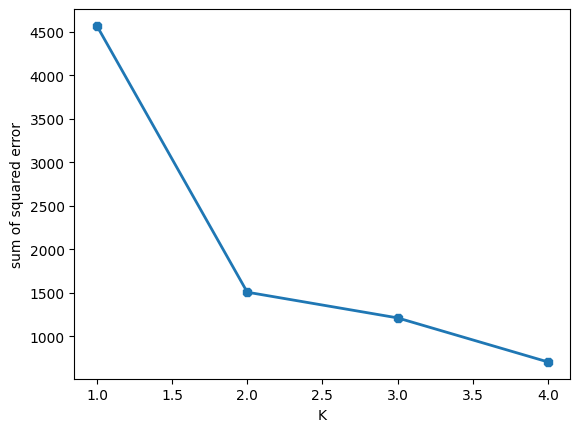

In [5]:
#elbow method for kmeans clustering
dtw_clustering.elbow_method()


Hierarchical Clustering with Euclidean Distance:
{'linkage_matrix': array([[ 8.        ,  9.        , 11.01474141,  2.        ],
       [ 3.        ,  4.        , 13.9363075 ,  2.        ],
       [ 1.        ,  2.        , 14.36269887,  2.        ],
       [ 5.        ,  7.        , 14.69225491,  2.        ],
       [ 6.        , 13.        , 15.3492518 ,  3.        ],
       [ 0.        , 12.        , 20.84520001,  3.        ],
       [10.        , 14.        , 26.45810807,  5.        ],
       [11.        , 15.        , 30.08104543,  5.        ],
       [16.        , 17.        , 78.27696124, 10.        ]]), 'clusters': array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1], dtype=int32), 'silhouette': np.float64(0.48220146946269626), 'time': 0.0015645027160644531}

Hierarchical Clustering with FastDTW Distance:
{'linkage_matrix': array([[  8.        ,   9.        , 136.72374785,   2.        ],
       [  1.        ,   2.        , 187.84482765,   2.        ],
       [  5.        ,   7.        , 198.5

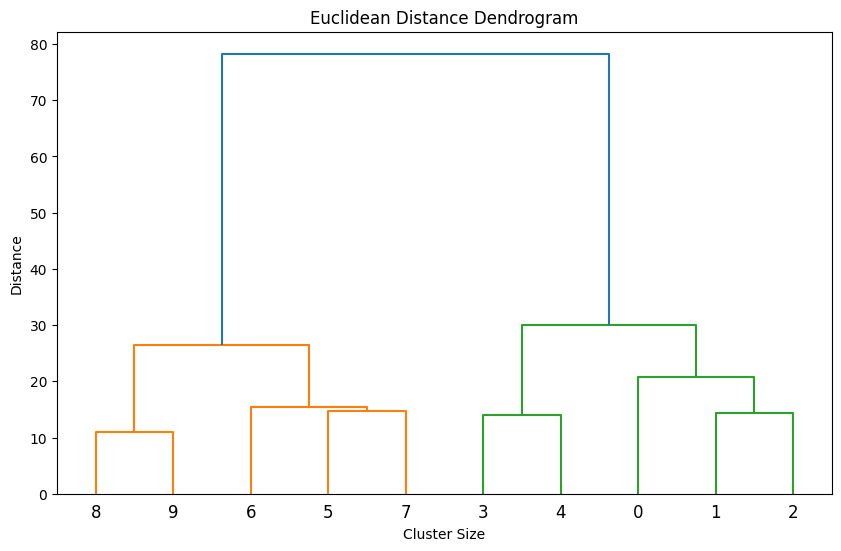


Plotting Dendrogram for FastDTW Hierarchical Clustering:


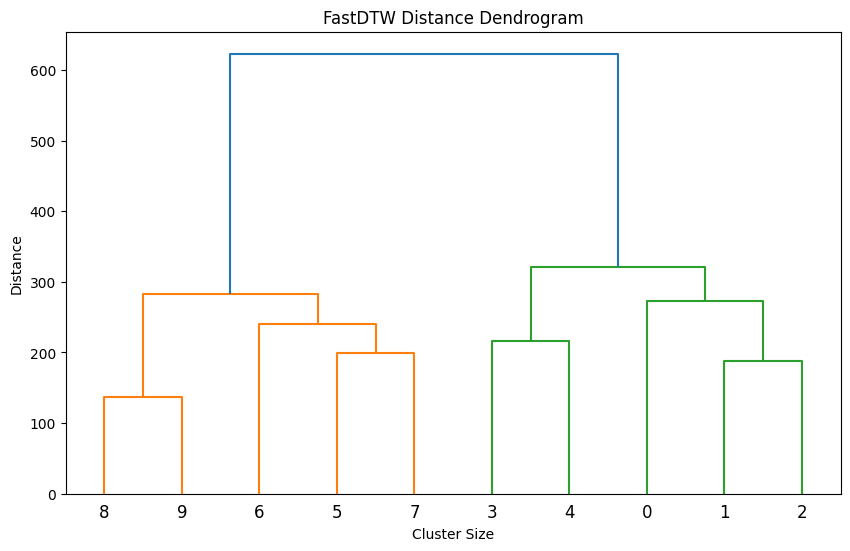


Cluster Analysis for Euclidean Hierarchical Clustering:

Euclidean Hierarchical Cluster Analysis
   Cluster  Total Return   Average  Variance
0        1   1785.001361  0.761195  0.339237
1        2  -1785.001361 -0.761195  0.463726

Cluster Analysis for FastDTW Hierarchical Clustering:

FastDTW Hierarchical Cluster Analysis
   Cluster  Total Return   Average  Variance
0        1   1785.001361  0.761195  0.339237
1        2  -1785.001361 -0.761195  0.463726


In [7]:

# 1. Hierarchical Clustering with Euclidean Distance
print("\nHierarchical Clustering with Euclidean Distance:")
hierarchical_results_euclidean = dtw_clustering.hierarchical_clustering(k=2, distance_metric="euclidean")
print(hierarchical_results_euclidean)

# 2. Hierarchical Clustering with FastDTW Distance
print("\nHierarchical Clustering with FastDTW Distance:")
hierarchical_results_fastdtw = dtw_clustering.hierarchical_clustering(k=2, distance_metric="fastdtw")
print(hierarchical_results_fastdtw)

# 3. KMeans Clustering with Euclidean Distance
print("\nKMeans Clustering with Euclidean Distance:")
kmeans_results_euclidean = dtw_clustering.kmeans_clustering(k=2, distance_metric="euclidean")
print(kmeans_results_euclidean)

# 5. DBSCAN Clustering with Euclidean Distance
print("\nDBSCAN Clustering with Euclidean Distance:")
dbscan_results_euclidean = dtw_clustering.dbscan_clustering(eps=0.5, min_samples=2, distance_metric="euclidean")
print(dbscan_results_euclidean)

# 6. DBSCAN Clustering with FastDTW Distance
print("\nDBSCAN Clustering with FastDTW Distance:")
dbscan_results_fastdtw = dtw_clustering.dbscan_clustering(eps=100, min_samples=2, distance_metric="fastdtw")
print(dbscan_results_fastdtw)

# 7. Plot dendrogram for hierarchical clustering
print("\nPlotting Dendrogram for Euclidean Hierarchical Clustering:")
dtw_clustering.plot_dendrogram(hierarchical_results_euclidean["linkage_matrix"], title="Euclidean Distance Dendrogram")

print("\nPlotting Dendrogram for FastDTW Hierarchical Clustering:")
dtw_clustering.plot_dendrogram(hierarchical_results_fastdtw["linkage_matrix"], title="FastDTW Distance Dendrogram")

# 8. Analyze Clusters
print("\nCluster Analysis for Euclidean Hierarchical Clustering:")
dtw_clustering.analyze_clusters(hierarchical_results_euclidean, k=2, title_prefix="Euclidean Hierarchical")

print("\nCluster Analysis for FastDTW Hierarchical Clustering:")
dtw_clustering.analyze_clusters(hierarchical_results_fastdtw, k=2, title_prefix="FastDTW Hierarchical")


C:\Users\Nicolò Dal Monte\AppData\Local\Temp\ipykernel_12016\3755407892.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_sp500_first_50['Hierarchical_Cluster'] = hierarchical_labels
C:\Users\Nicolò Dal Monte\AppData\Local\Temp\ipykernel_12016\3755407892.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp500_first_50['Hierarchical_Cluster'] = hierarchical_labels
C:\Users\Nicolò Dal Monte\AppData\Local\Temp\ipykernel_12016\3755407892.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usual

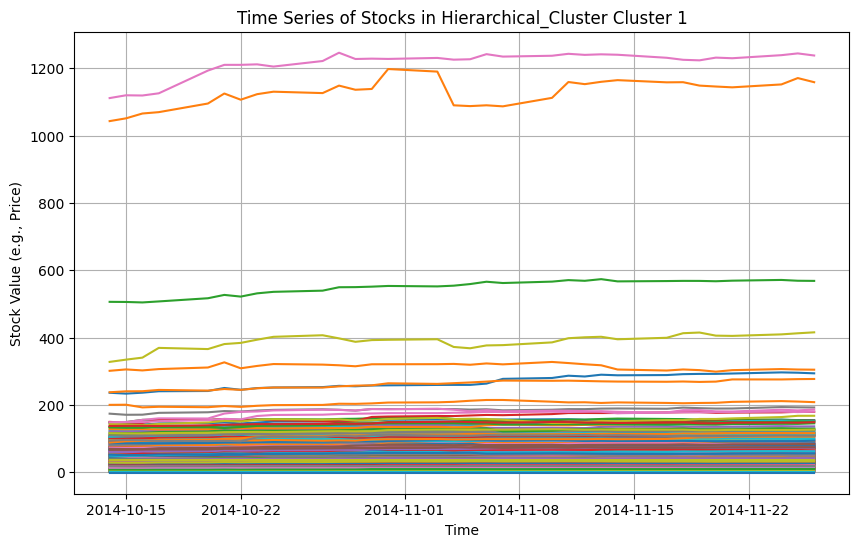

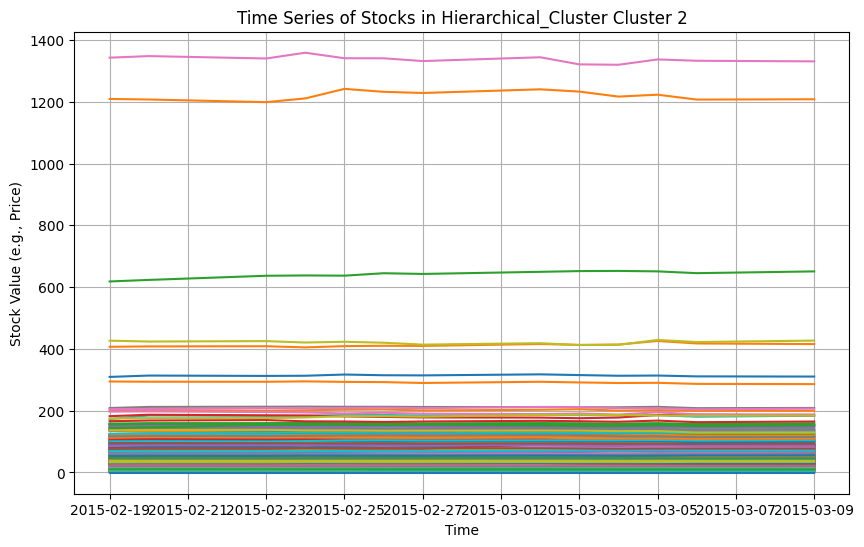

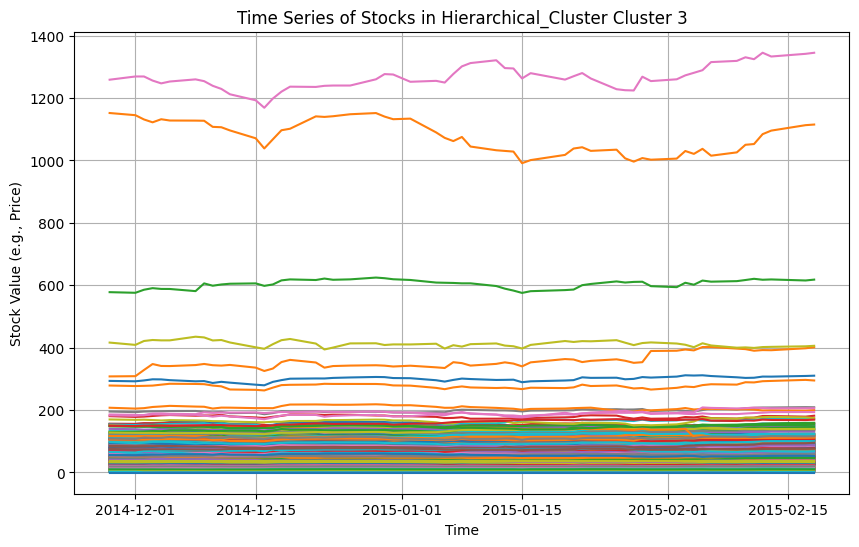

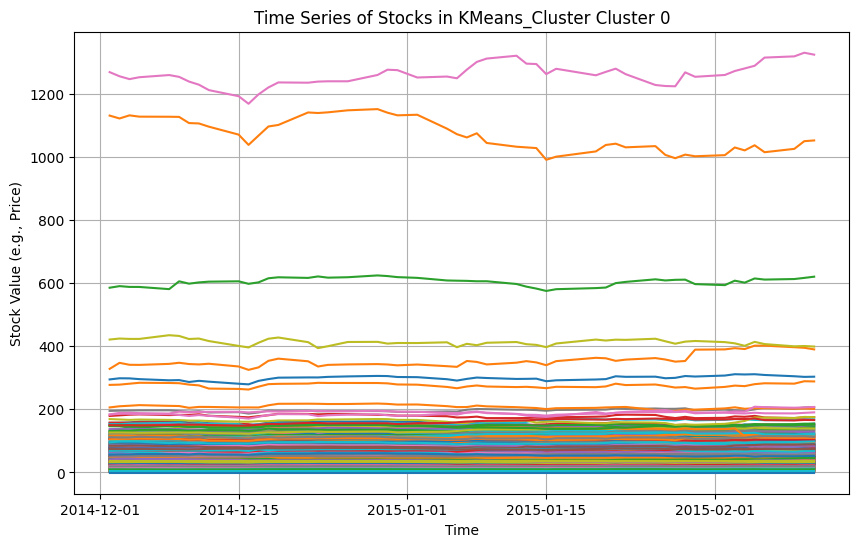

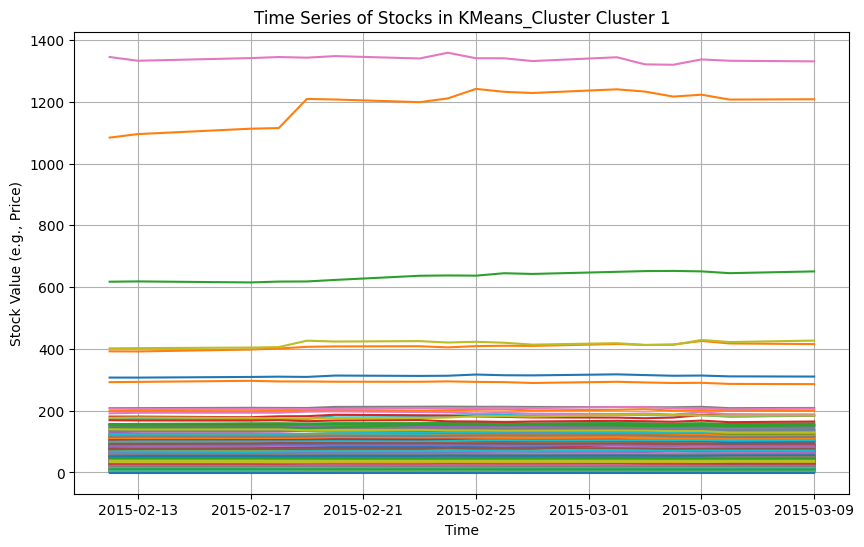

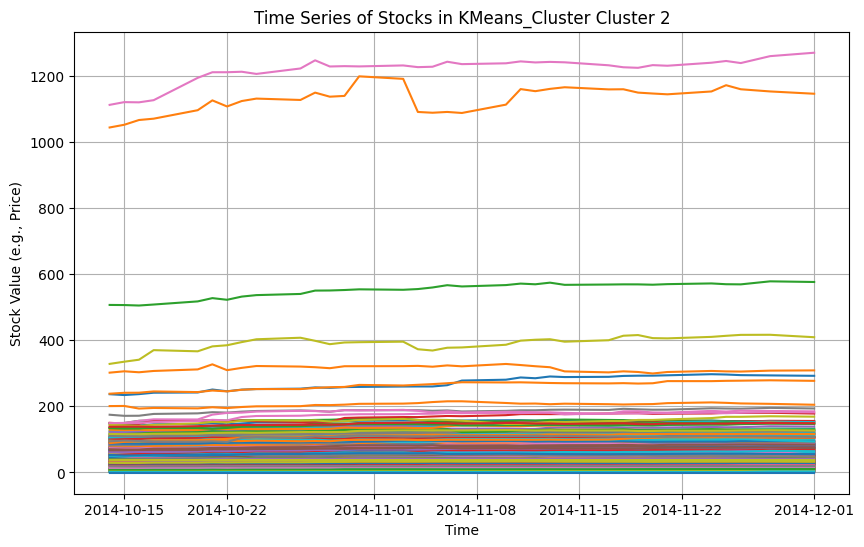

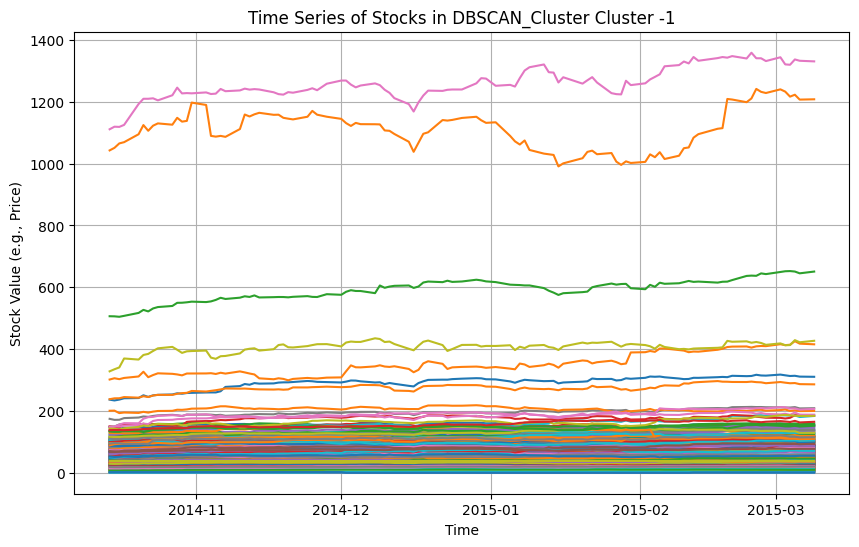

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Take the first 50 timestamps from df_sp500
df_sp500_first_50 = df_sp500.iloc[:100]  # Take the first 50 rows

# Initialize DTWClustering with the sliced DataFrame
dtw_clustering = DTWClustering(df_sp500_first_50)

# Step 2: Perform Hierarchical Clustering with Euclidean Distance
hierarchical_results_euclidean = dtw_clustering.hierarchical_clustering(k=3, distance_metric="euclidean")
hierarchical_labels = hierarchical_results_euclidean['clusters']

# Step 3: Perform KMeans Clustering with Euclidean Distance
kmeans_results_euclidean = dtw_clustering.kmeans_clustering(k=3, distance_metric="euclidean")
kmeans_labels = kmeans_results_euclidean['clusters']

# Step 4: Perform DBSCAN Clustering with Euclidean Distance
dbscan_results_euclidean = dtw_clustering.dbscan_clustering(eps=0.5, min_samples=2, distance_metric="euclidean")
dbscan_labels = dbscan_results_euclidean['clusters']

# Step 5: Add cluster labels to the DataFrame for each clustering method
df_sp500_first_50['Hierarchical_Cluster'] = hierarchical_labels
df_sp500_first_50['KMeans_Cluster'] = kmeans_labels
df_sp500_first_50['DBSCAN_Cluster'] = dbscan_labels

# Function to plot time series for each clustering method
def plot_clusters(cluster_labels, cluster_method_name):
    clusters_time_series = {}
    
    # Group stocks by their cluster label and store the time series
    for cluster in np.unique(cluster_labels):
        # Filter out the stocks belonging to the current cluster
        stocks_in_cluster = df_sp500_first_50[df_sp500_first_50[cluster_method_name] == cluster].drop([cluster_method_name], axis=1)
        clusters_time_series[cluster] = stocks_in_cluster
    
    # Step 6: Plot the time series for each cluster
    for cluster, data in clusters_time_series.items():
        # Skip empty clusters (if any)
        if len(data) == 0:
            continue
        
        # Create a plot for the current cluster
        plt.figure(figsize=(10, 6))
        
        # Plot each stock's time series in the cluster without the label
        for column in data.columns:
            plt.plot(data.index, data[column])  # No 'label=column' to remove the stock names in the legend
        
        plt.title(f"Time Series of Stocks in {cluster_method_name} Cluster {cluster}")
        plt.xlabel("Time")
        plt.ylabel("Stock Value (e.g., Price)")
        plt.grid(True)
        plt.show()

# Step 7: Plot the time series for each clustering method
plot_clusters(hierarchical_labels, "Hierarchical_Cluster")
plot_clusters(kmeans_labels, "KMeans_Cluster")
plot_clusters(dbscan_labels, "DBSCAN_Cluster")
